In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from scipy import signal



df = pd.read_excel('data_rate.xlsx')

#df = df.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

#df.head(10)

Lying = df[['Lying', 'Unnamed: 2', 'Unnamed: 3']]
Lying = Lying.dropna()
Lying.index = pd.RangeIndex(len(Lying.index))
Lying = Lying.drop(0)
#print(Lying)

Sitting = df[['Sitting', 'Unnamed: 5', 'Unnamed: 6']]
Sitting = Sitting.dropna()
Sitting.index = pd.RangeIndex(len(Sitting.index))
Sitting = Sitting.drop(0)
#print(Sitting)

Standing = df[['Standing', 'Unnamed: 8', 'Unnamed: 9']]
Standing = Standing.dropna()
Standing.index = pd.RangeIndex(len(Standing.index))
Standing = Standing.drop(0)
#print(Standing)

Normal_walking = df[['Normal walking', 'Unnamed: 11', 'Unnamed: 12']]
Normal_walking = Normal_walking.dropna()
Normal_walking.index = pd.RangeIndex(len(Normal_walking.index))
Normal_walking = Normal_walking.drop(0)
#print(Normal_walking)

Active_walking = df[['Active walking', 'Unnamed: 14', 'Unnamed: 15']]
Active_walking = Active_walking.dropna()
Active_walking.index = pd.RangeIndex(len(Active_walking.index))
Active_walking = Active_walking.drop(0)
#print(Active_walking)


In [24]:
window_size = 1
stride = 1


X_lying_train = [Lying[i:i+window_size] for i in range(0, int(len(Lying)*0.6), stride) if i+window_size<=int(len(Lying))]
X_lying_test = [Lying[i:i+window_size] for i in range(int(len(Lying)*0.6), len(Lying), stride) if i+window_size<=len(Lying)]

X_sitting_train = [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)*0.6), stride) if i+window_size<=int(len(Sitting))]
X_sitting_test = [Sitting[i:i+window_size] for i in range(int(len(Sitting)*0.6), len(Sitting), stride) if i+window_size<=len(Sitting)]

X_standing_train = [Standing[i:i+window_size] for i in range(0, int(len(Standing)*0.6), stride) if i+window_size<=int(len(Standing))]
X_standing_test = [Standing[i:i+window_size] for i in range(int(len(Standing)*0.6), len(Standing), stride) if i+window_size<=len(Standing)]

X_normalw_train = [Normal_walking[i:i+window_size] for i in range(0, int(len(Normal_walking)*0.6), stride) if i+window_size<=int(len(Normal_walking))]
X_normalw_test = [Normal_walking[i:i+window_size] for i in range(int(len(Normal_walking)*0.6), len(Normal_walking), stride) if i+window_size<=len(Normal_walking)]

X_activew_train = [Active_walking[i:i+window_size] for i in range(0, int(len(Active_walking)*0.6), stride) if i+window_size<=int(len(Active_walking))]
X_activew_test = [Active_walking[i:i+window_size] for i in range(int(len(Active_walking)*0.6), len(Active_walking), stride) if i+window_size<=len(Active_walking)]

In [25]:
#Catch 'em all

my_train_data = []
my_train_lable = []

my_test_data = []
my_test_lable = []


for acts in X_lying_train:
    my_train_data.append(acts)
    my_train_lable.append(0)
    
for acts in X_sitting_train:
    my_train_data.append(acts)
    my_train_lable.append(1)
    
for acts in X_standing_train:
    my_train_data.append(acts)
    my_train_lable.append(2)

for acts in X_normalw_train:
    my_train_data.append(acts)
    my_train_lable.append(3)

for acts in X_activew_train:
    my_train_data.append(acts)
    my_train_lable.append(4)
    
print('my-train-data\'s length: ', len(my_train_data) )
print('my-train-lable\'s length: ', len(my_train_lable) )

#Catch 'em all

for acts in X_lying_test:
    my_test_data.append(acts)
    my_test_lable.append(0)
        
for acts in X_sitting_test:
    my_test_data.append(acts)
    my_test_lable.append(1)
        
for acts in X_standing_test:
    my_test_data.append(acts)
    my_test_lable.append(2)
    
for acts in X_normalw_test:
    my_test_data.append(acts)
    my_test_lable.append(3)

for acts in X_activew_test:
    my_test_data.append(acts)
    my_test_lable.append(4)
    
print('my-test-data\'s length: ', len(my_test_data) )
print('my-test-lable\'s length: ', len(my_test_lable) )

my-train-data's length:  10400
my-train-lable's length:  10400
my-test-data's length:  6934
my-test-lable's length:  6934


In [26]:
def feature(at, fs):    
    feat = np.zeros(6)
    #feat = []
    x = np.array(at.iloc[:,0], dtype=np.float64)   # x acceleration component
    y = np.array(at.iloc[:,1], dtype=np.float64)   # y
    z = np.array(at.iloc[:,2], dtype=np.float64)   # z
    
    energy = [ np.amin(i) for i in [x,y,z]]
    feat[0:3] = energy
    return feat


import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)
    print(num_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#000000', '#00AAFF', '#FF00AA', '#6e8216', '#ff6e00']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels)
    #f = plt.figure(figsize=(10, 10))
    plt.figure(figsize=(9, 9))

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, lw=1)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)
    
    #plt.xlabel('First t-SNE feature')
    #plt.ylabel('Second t-SNE feature')
    #plt.title('Cow dataset representation after feature extraction', fontsize=20);

    plt.show()

[[ -3.2828574  26.405102 ]
 [ -3.2828574  26.405102 ]
 [ -3.2828574  26.405102 ]
 ...
 [-26.352627   -0.5996693]
 [ 46.761845   32.157402 ]
 [ 77.84077    -8.107037 ]]
5


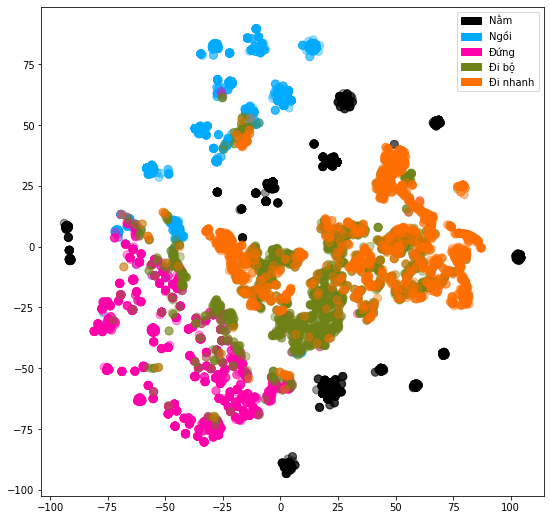

In [27]:
train_features = []
test_features = []
for action in my_train_data:
    feat = feature(action, 1)
    train_features.append(feat)


x1 = train_features
y1 = my_train_lable

n_samples = 300
n_components = 2
perplexity = 30
RS = 1000

from sklearn.manifold import TSNE

#tsne = TSNE(n_components=n_components, init='random',
#                         random_state=RS, perplexity=perplexity)

X_tsne1 = TSNE(random_state=RS).fit_transform(x1)
print(X_tsne1)

plot_labelled_scatter(X_tsne1, y1,['Nằm', 'Ngồi', 'Đứng', 'Đi bộ', 'Đi nhanh'])
